In [1]:
import pandas as pd

# path to csv's files
path_to_history_prices = '..//csv_s//history_prices.csv'
path_to_investment_currencyhistory = '..//csv_s//investment_currencyhistory.csv'
path_to_securities = '..//csv_s//securities.csv'
path_to_сlients = '..//csv_s//history_prices.csv'

# read files
history_prices = pd.read_csv(path_to_history_prices)
investment_currencyhistory = pd.read_csv(path_to_investment_currencyhistory) 
securities = pd.read_csv(path_to_securities) 
сlients = pd.read_csv(path_to_сlients)

# drop column
history_prices = history_prices.drop(columns=['Unnamed: 0'])
investment_currencyhistory = investment_currencyhistory.drop(columns=['Unnamed: 0'])
securities = securities.drop(columns=['Unnamed: 0'])
securities['client_date'] = pd.to_datetime(securities['client_date'], format='%Y-%m-%d')

сlients = сlients.drop(columns=['Unnamed: 0'])

securities['client_date'] = pd.to_datetime(securities['client_date'],
                                                          format='%Y-%m-%d')
securities['client_date'] = securities['client_date'].dt.strftime('%Y-%m-%d')

In [2]:
securities

,operation_id,client_id,client_date,client_isin_paper,client_n_papers,client_currency,client_rialto,client_closing_price
0,455,3,2023-01-17,fdsfaw,46,RUB,LON,49426
1,553,5,2023-02-25,fjwj4nfu4,10,AUD,GON,417761
2,5807,4,2023-01-21,gdhf72,390,AUD,LON,203273
3,3855,6,2023-03-16,dcw12l1,487,RUB,BER,186051
4,1358,1,2023-03-10,dcw12l1,72,RUB,NYC,407353
...,...,...,...,...,...,...,...,...
151,4373,9,2023-02-26,f3bfic3,478,USD,MSK,61882
152,2594,9,2023-01-10,11dd,138,RUB,NYC,349530
153,3395,3,2023-02-13,fjwj4nfu4,282,EUR,MSK,112996
154,1475,9,2023-02-16,dcw12l1,134,EUR,GON,9668


In [3]:
securities = securities.sort_values(by=['client_id', 'client_date']).reset_index(drop=True, inplace=False)

In [4]:
securities

,operation_id,client_id,client_date,client_isin_paper,client_n_papers,client_currency,client_rialto,client_closing_price
0,811,1,2023-01-05,dwwdsxw1,452,EUR,BER,403389
1,6004,1,2023-01-08,fjwj4nfu4,137,RUB,LON,467368
2,3555,1,2023-01-19,ldoddd3,400,RUB,SPD,195477
3,4696,1,2023-01-29,fmdkwm1e1,215,USD,MSK,12624
4,4860,1,2023-02-09,3kj3j3,394,AUD,MSK,12619
...,...,...,...,...,...,...,...,...
151,158,10,2023-03-07,fdsfaw,279,EUR,SPD,256324
152,6143,10,2023-03-11,dcw12l1,374,RUB,MSK,459934
153,156,10,2023-03-15,fjdh22,352,RUB,MSK,452285
154,5068,10,2023-03-19,5673d,188,USD,NYC,248242


In [5]:
securities.client_id.nunique()

10

In [6]:
"""
10 различных клиентов.

Выберем всю информацию по клиенту №1
"""

client_1 = securities.copy()
client_1 = client_1.drop(columns=['operation_id'])
client_1 = client_1.loc[client_1['client_id'] == 1]

In [7]:
from matplotlib import patheffects
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns; sns.set();
import numpy as np

In [8]:
client_1

,client_id,client_date,client_isin_paper,client_n_papers,client_currency,client_rialto,client_closing_price
0,1,2023-01-05,dwwdsxw1,452,EUR,BER,403389
1,1,2023-01-08,fjwj4nfu4,137,RUB,LON,467368
2,1,2023-01-19,ldoddd3,400,RUB,SPD,195477
3,1,2023-01-29,fmdkwm1e1,215,USD,MSK,12624
4,1,2023-02-09,3kj3j3,394,AUD,MSK,12619
5,1,2023-02-23,defdjwkf3,423,AUD,GON,364425
6,1,2023-03-03,fjwj4nfu4,483,USD,NYC,445449
7,1,2023-03-10,dcw12l1,72,RUB,NYC,407353
8,1,2023-03-12,5673d,80,EUR,MSK,286222
9,1,2023-03-16,dcw12l1,458,USD,MSK,150716


In [9]:
list_of_unique_isin = client_1['client_isin_paper'].unique().tolist()
list_of_unique_isin

['dwwdsxw1',
 'fjwj4nfu4',
 'ldoddd3',
 'fmdkwm1e1',
 '3kj3j3',
 'defdjwkf3',
 'dcw12l1',
 '5673d',
 'fjdh22']

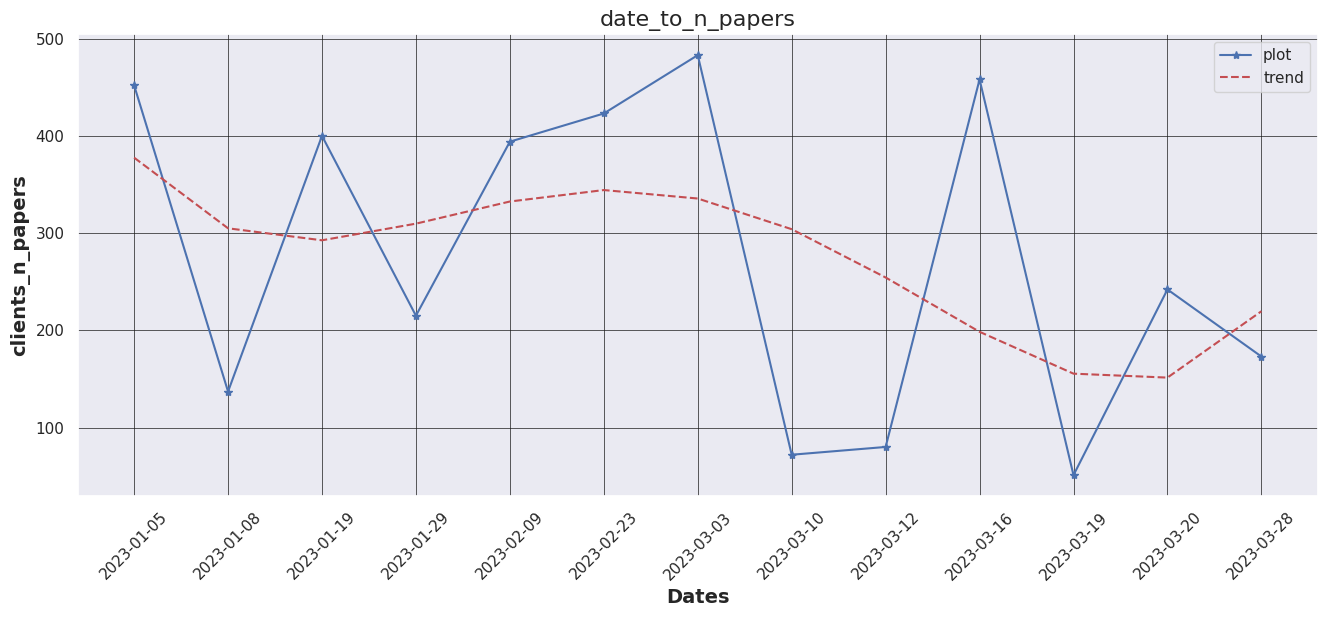

In [10]:
fig, ax = plt.subplots(figsize=(16, 6))


ax.plot(client_1['client_date'],
        client_1['client_n_papers'],
        label="date_to_n_papers",
        # path_effects=[patheffects.withTickedStroke()],
        marker = '*',
       )
# Trend
#calculate equation for quadratic trendline
xn = len(client_1['client_date'])
x = np.arange(0, xn)
y = client_1['client_n_papers']
z = np.polyfit (x, y, 4)
p = np.poly1d (z)
ax.plot(x ,p(x), "r--")

ax.grid(which='major',
        color = 'k', 
        linewidth = 0.5)
ax.grid(which='minor', 
        color = 'k', 
        linestyle = ':')

plt.title('date_to_n_papers',size=16)
plt.xlabel('Dates', fontsize=14, fontweight="bold")
plt.ylabel("clients_n_papers", fontsize=14, fontweight="bold")
plt.xticks(rotation=45)
ax.legend(['plot', 'trend'])

plt.show();

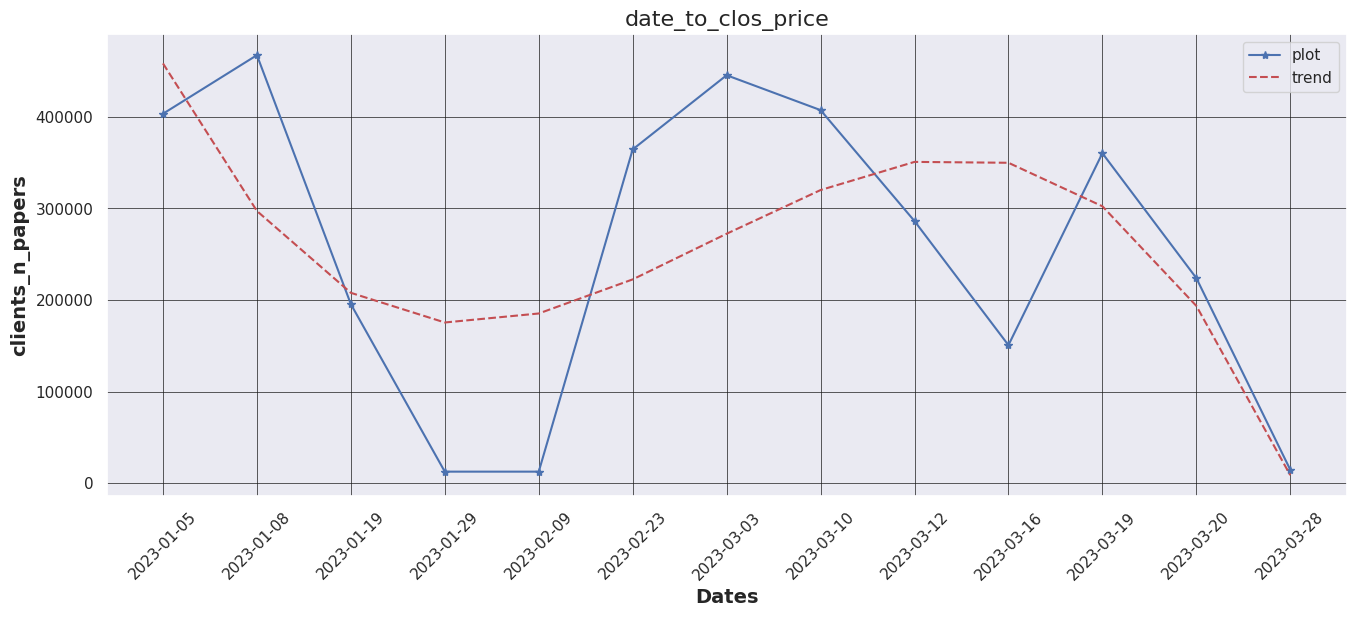

In [11]:
fig, ax = plt.subplots(figsize=(16, 6))


ax.plot(client_1['client_date'],
        client_1['client_closing_price'],
        label="date_to_n_papers",
        # path_effects=[patheffects.withTickedStroke()],
        marker = '*',
       )

# Trend
#calculate equation for quadratic trendline
xn = len(client_1['client_date'])
x = np.arange(0, xn)
y = client_1['client_closing_price']
z = np.polyfit (x, y, 3)
p = np.poly1d (z)
ax.plot(x ,p(x), "r--")

ax.grid(which='major',
        color = 'k', 
        linewidth = 0.5)
ax.grid(which='minor', 
        color = 'k', 
        linestyle = ':')

plt.title('date_to_clos_price',size=16)
plt.xlabel('Dates', fontsize=14, fontweight="bold")
plt.ylabel("clients_n_papers", fontsize=14, fontweight="bold")
plt.xticks(rotation=45)
ax.legend(['plot', 'trend'])

plt.show();

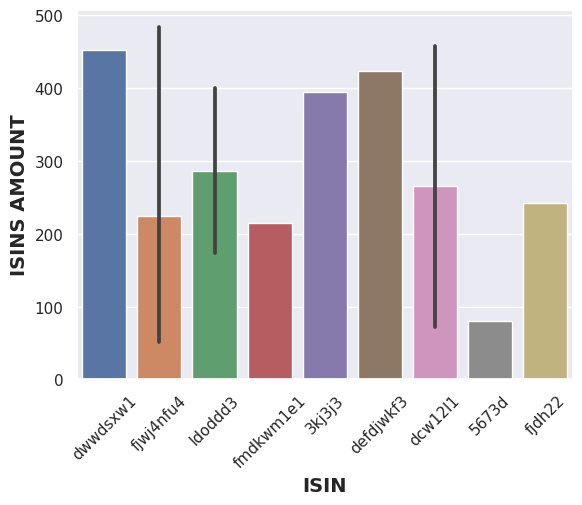

In [12]:
sns.barplot(data=client_1, x="client_isin_paper", y="client_n_papers")
plt.xlabel('ISIN', fontsize=14, fontweight="bold")
plt.ylabel("ISINS AMOUNT", fontsize=14, fontweight="bold")
plt.xticks(rotation=45);

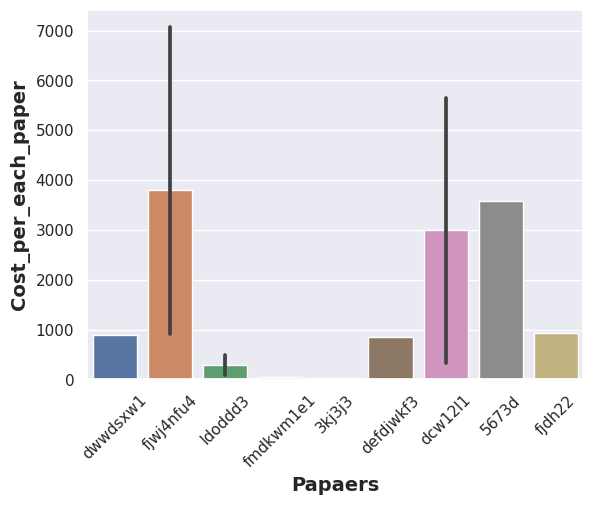

In [13]:
y = (client_1['client_closing_price'] / client_1['client_n_papers']).round(2)
sns.barplot(data=client_1, x="client_isin_paper", y=y)
plt.xlabel('Papaers', fontsize=14, fontweight="bold")
plt.ylabel("Cost_per_each_paper", fontsize=14, fontweight="bold")
plt.xticks(rotation=45);

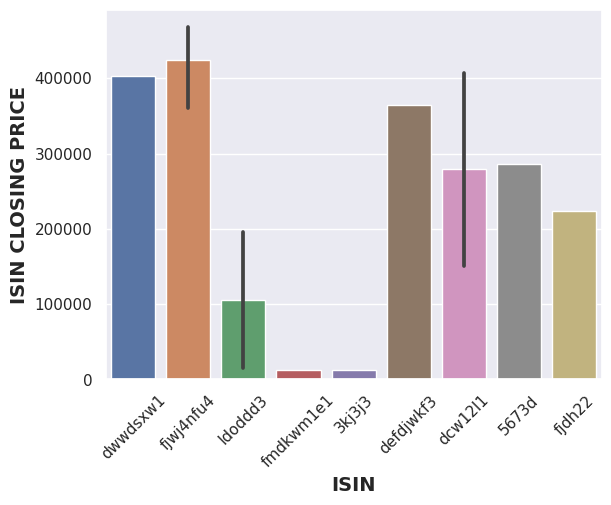

In [14]:
sns.barplot(data=client_1, x="client_isin_paper", y="client_closing_price")
plt.xlabel('ISIN', fontsize=14, fontweight="bold")
plt.ylabel("ISIN CLOSING PRICE", fontsize=14, fontweight="bold")
plt.xticks(rotation=45);

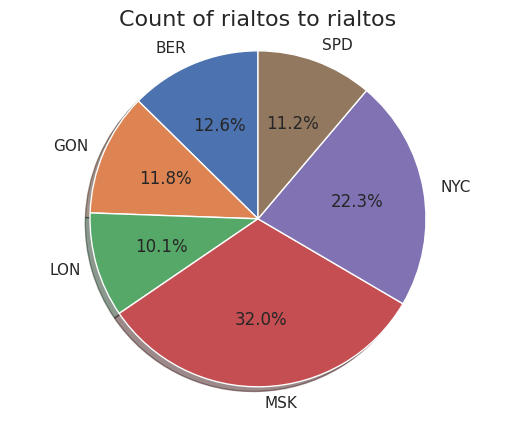

In [35]:
client_1_list = client_1.values.tolist()

average = []
buf = []
for i in range(len(client_1_list)):

    try: 
        if client_1_list[i][5] == client_1_list[i+1][5]:
            buf.append(client_1_list[i][3])
        else:
            buf.append(client_1_list[i][3])
            summ = np.sum(buf)
            average.append(summ)
            buf = []
    except IndexError:
        buf.append(client_1_list[i][3])
        summ = np.sum(buf)
        average.append(summ)
        buf = [] 
        
n_rialtos = client_1['client_rialto'].unique()


labels = n_rialtos
sizes = average
# explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes,
        # explode=explode,
        labels=labels,
        autopct='%1.1f%%',
        shadow=True, 
        startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Count of rialtos to rialtos',size=16)

plt.show()


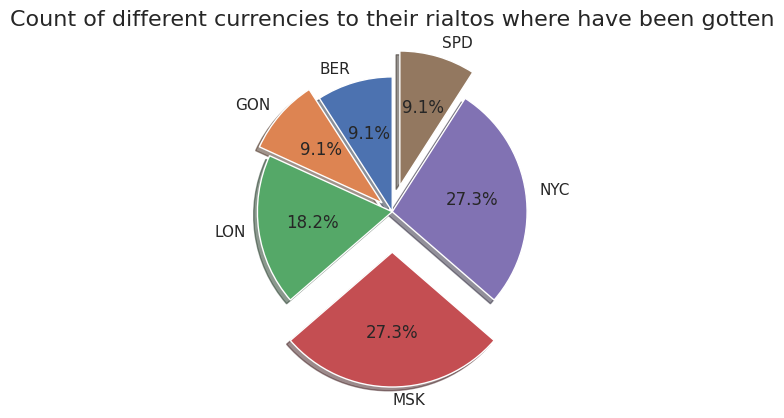

In [50]:
labels = n_rialtos
sizes = [1, 1, 2, 3, 3, 1]
explode = (0, 0.1, 0, 0.3, 0, 0.2)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes,
        explode=explode,
        labels=labels,
        autopct='%1.1f%%',
        shadow=True, 
        startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Count of different currencies to their rialtos where have been gotten',size=16)

plt.show()